# ONLINE RETAIL

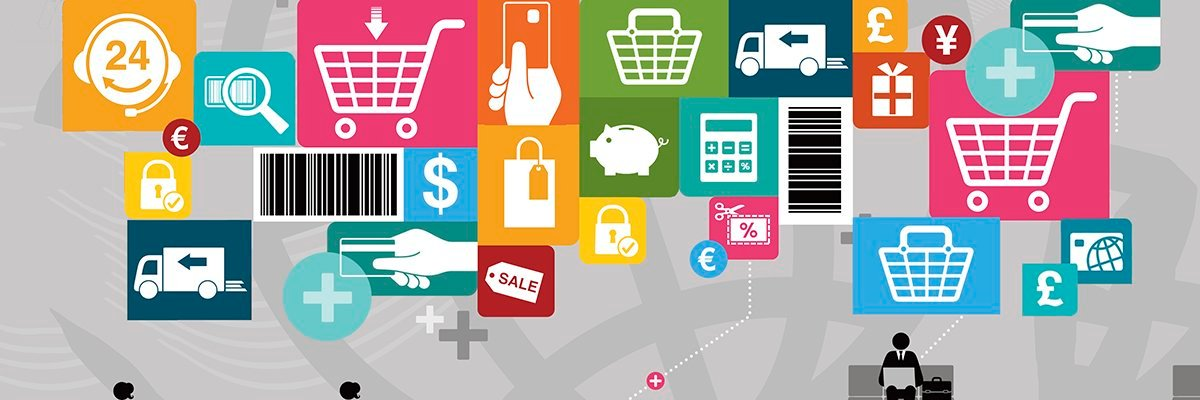

download data at https://archive.ics.uci.edu/ml/datasets/Online+Retail

Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (20,7)

In [38]:
dataset=pd.read_csv("Data/Online Retail.csv")

In [39]:
dataset.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [69]:
tot_per_product=dataset['Quantity']*dataset['UnitPrice']

In [71]:
type(tot_per_product)

pandas.core.series.Series

In [83]:
dataset['tot_per_product'] = pd.Series(tot_per_product, index=dataset.index)

In [84]:
type(dataset)

pandas.core.frame.DataFrame

In [86]:
dataset.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tot_per_product
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [40]:
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Unnamed: 0', 'Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [41]:
categorical_features = dataset.select_dtypes(include=[np.object])
categorical_features.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [42]:
dataset.isnull().values.any()

True

In [43]:
categorical_features_name=['CustomerID']

In [20]:
#for i in categorical_features_name:
    #dataset[i]=dataset[i].fillna("UNKNOWN")

In [44]:
x=dataset.iloc[:,[4,7]].values

In [45]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
x[:,1]=lab.fit_transform(x[:,1])

In [46]:
x

array([[  6.00000000e+00,   4.04800000e+03],
       [  6.00000000e+00,   4.04800000e+03],
       [  8.00000000e+00,   4.04800000e+03],
       ..., 
       [  4.00000000e+00,   2.75000000e+02],
       [  4.00000000e+00,   2.75000000e+02],
       [  3.00000000e+00,   2.75000000e+02]])

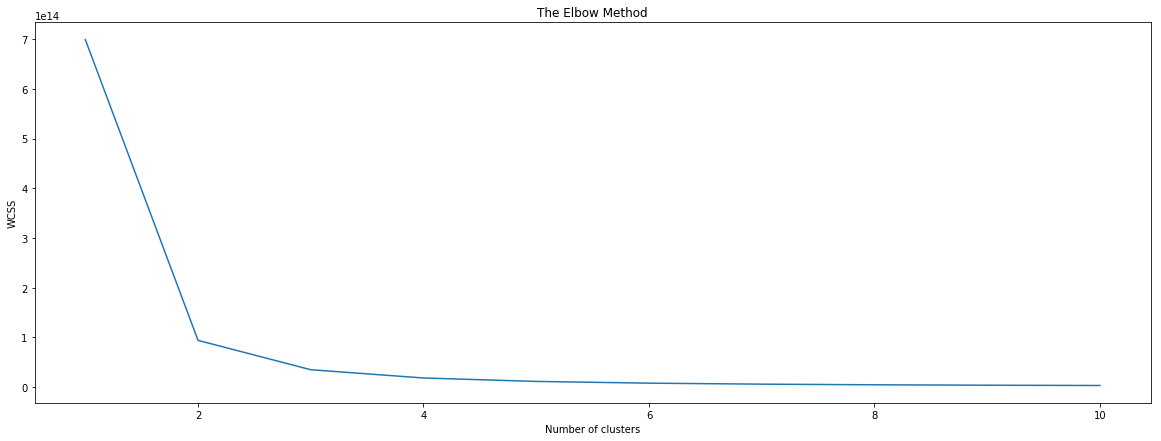

In [47]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

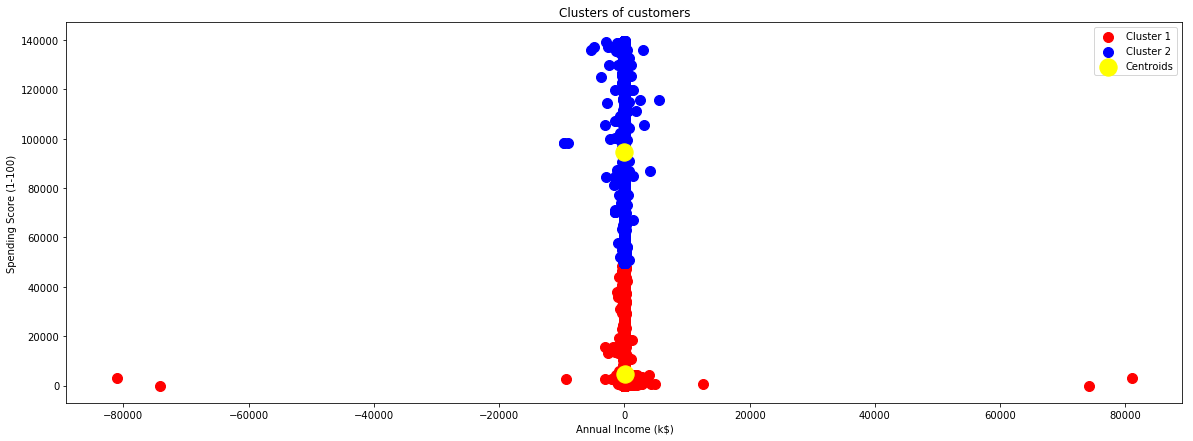

In [49]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()